## Design Summary

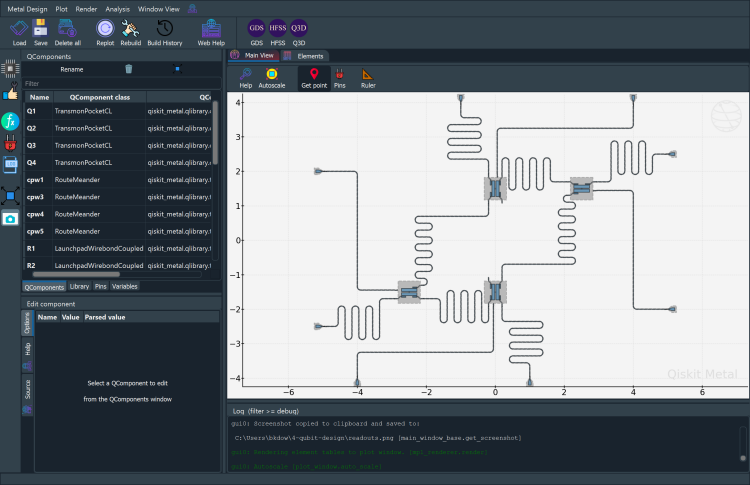


Target frequencies are summarized below. Frequency spacings are set to be as large as possible within the given constraint on the available electronnics to minimize the crosstalk. Target readout frequencies are calculated from the set qubit frequencies with the formula $\chi\approx-\frac{g^2 E_c}{\Delta (\Delta-Ec)}$. Substituting the target values given in the problem yields a quadratic equation on the detuning $\Delta = \omega_q-\omega_r$, which gives the solution of $\Delta = -1.8$ or $1.5$.

### Target Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25|5.42|5.58|5.75|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|7.05|7.22|7.38|7.55|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|8.00|8.40|8.80|9.20|

### Achieved Frequencies
| Qubit # | Q1 | Q2 | Q3 | Q4|
|---|---|---|---|---|
|Freq(GHz)|5.25984|5.486713|5.557822|5.75221|

| RO # | RO1 | RO2 | RO3 | RO4|
|---|---|---|---|---|
|Freq(GHz)|6.7134|7.10829|7.38|7.78023|

| CPW # | CPW1 | CPW2 | CPW3 | CPW4|
|---|---|---|---|---|
|Freq(GHz)|7.78023|8.69631|8.767001|9.16086|

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
design.chips.main.size_x = '12mm'
design.chips.main.size_y = '10mm'

In [4]:
gui = MetalGUI(design)

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 5
design_span_y = 3

half_chip_width = design_span_x / 2
half_chip_height = design_span_y / 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

connection23_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection23_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [6]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q1', 'b', 'Q2', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw3', 'Q4', 'b', 'Q3', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [8]:
readout_lines = []

asym_14 = 700
asym_23 = 700
options = Dict(
    lead=Dict(
        start_straight='330um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '8 mm', f'{asym_14}um'))

options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '8 mm', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [9]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-4, -1.42])
anchors1c[1] = np.array([-4, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([4, 1.42])
anchors4c[1] = np.array([4, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

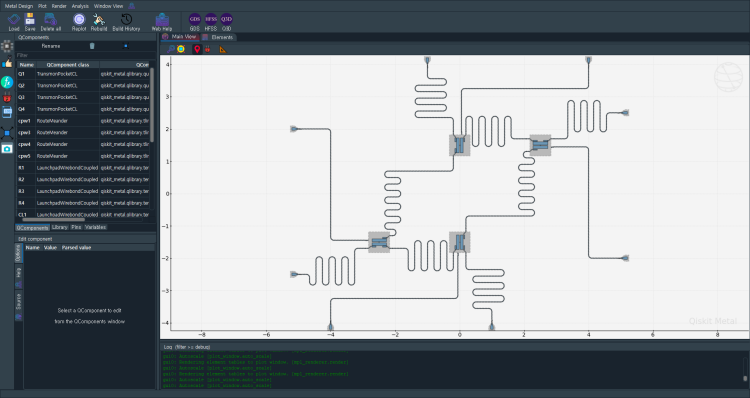

In [10]:
gui.autoscale()
gui.screenshot(name="full_design")

In [11]:
import numpy as np
from scipy.constants import c, h, pi, hbar, e
from qiskit_metal.analyses.em.cpw_calculations import guided_wavelength

# constants:
phi0    = h/(2*e)
varphi0 = phi0/(2*pi)

# project target parameters
f_qList = np.around(np.linspace(5.25, 5.75, 4),2) # GHz
f_rList = f_qList + 1.8 # GHz
L_JJList = np.around(varphi0**2/((f_qList*1e9+300e6)**2/(8*300e6))/h*1e9, 2) # nH

# initial CPW readout lengths
def find_resonator_length(frequency, line_width, line_gap, N): 
    #frequency in GHz
    #line_width/line_gap in um
    #N -> 2 for lambda/2, 4 for lambda/4
    
    [lambdaG, etfSqrt, q] = guided_wavelength(frequency*10**9, line_width*10**-6,
                                              line_gap*10**-6, 750*10**-6, 200*10**-9)
    return str(lambdaG/N*10**3)+" mm"

find_resonator_length(f_rList, 10, 6, 2)

'[8.63311117 8.42983847 8.24707774 8.06138195] mm'

In [12]:
find_resonator_length(np.around(np.linspace(8, 9.2, 4), 2), 10, 6, 2)

'[7.60792921 7.24564687 6.91629928 6.61559061] mm'

In [13]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '550um' # 405
transmons[0].options.pad_height = '120um'

transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '540um' # 405
transmons[1].options.pad_height = '120um'

transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '530um' # 405
transmons[2].options.pad_height = '120um'

transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '520um' # 405
transmons[3].options.pad_height = '120um'

readout_lines[0].options.total_length = '8.63mm'
readout_lines[1].options.total_length = '8.42mm'
readout_lines[2].options.total_length = '8.24mm'
readout_lines[3].options.total_length = '8.06mm'

cpw[0].options.total_length = '7.6mm'
cpw[1].options.total_length = '7.2mm'
cpw[2].options.total_length = '6.9mm'
cpw[3].options.total_length = '6.6mm'

gui.rebuild()
gui.autoscale()

qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
qcomps['Q3'].options['hfss_inductance'] = 'Lj3'
qcomps['Q3'].options['hfss_capacitance'] = 'Cj3'
qcomps['Q4'].options['hfss_inductance'] = 'Lj4'
qcomps['Q4'].options['hfss_capacitance'] = 'Cj4'

### Q3D Analysis

In [14]:
from qiskit_metal.analyses.quantization import EPRanalysis, LOManalysis

c1 = LOManalysis(design, "q3d")
q3d1 = c1.sim.renderer
q3d1.start()

q3d1.activate_ansys_design("qubit_pad_w_550_520", 'capacitive')
q3d1.render_design([], [])

q3d1.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05)
q3d1.analyze_setup("Setup")
c1.sim.capacitance_matrix, c1.sim.units = q3d1.get_capacitance_matrix()
c1.sim.capacitance_all_passes, _ = q3d1.get_capacitance_all_passes()
c1.sim.capacitance_matrix

INFO 03:46AM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:46AM [load_ansys_project]: 	Opened Ansys App
INFO 03:46AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 03:46AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/sunpark/Documents/Ansoft/
	Project:   Project52
INFO 03:46AM [connect_design]: 	Opened active design
	Design:    full_circuit [Solution type: Q3D]
INFO 03:46AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:46AM [connect]: 	Connected to project "Project52" and design "full_circuit" 😀 

03:46AM 15s WARNING [activate_ansys_design]: The design_name=qubit_pad_w_550_520 was not in active project.  Designs in active project are: 
['full_circuit'].  A new design will be added to the project.  
INFO 03:46AM [connect_design]: 	Opened active design
	Design:    qubit_pad_w_550_520 [Solution type: Q3D]
WARNING 03:46AM [connect_setup]: 	No design setup detected.
WARNING 03:46AM [connect_setup]: 	Creating

,a_connector_pad_Q1,a_connector_pad_Q2,a_connector_pad_Q3,a_connector_pad_Q4,c_connector_pad_Q1,c_connector_pad_Q2,c_connector_pad_Q3,c_connector_pad_Q4,cl_metal_Q1,cl_metal_Q2,...,launch_pad_R3,launch_pad_R4,pad_bot_Q1,pad_bot_Q2,pad_bot_Q3,pad_bot_Q4,pad_top_Q1,pad_top_Q2,pad_top_Q3,pad_top_Q4
a_connector_pad_Q1,1210.85977,-0.19035,-0.07706,-0.00145,-0.13273,-0.00106,-0.20723,-0.00024,-0.01355,-0.00049,...,-0.00143,-0.00007,-13.26098,-0.00690,-1.19185,-0.00097,-1.01798,-0.00294,-13.99225,-0.00106
a_connector_pad_Q2,-0.19035,1324.71931,-0.00797,-0.07276,-0.06508,-0.13460,-0.00353,-0.00075,-0.02770,-0.01259,...,-0.00022,-0.00010,-1.06178,-13.32655,-0.01203,-0.00160,-13.51460,-1.01098,-0.01772,-0.00222
a_connector_pad_Q3,-0.07706,-0.00797,1260.00470,-0.19920,-0.00044,-0.00200,-0.14332,-0.07002,-0.00038,-0.00473,...,-0.00051,-0.00043,-0.00254,-0.01226,-13.38732,-1.08145,-0.00216,-0.01643,-1.02575,-13.72947
a_connector_pad_Q4,-0.00145,-0.07276,-0.19920,1162.22026,-0.00132,-0.20057,-0.00141,-0.15879,-0.00024,-0.27012,...,-0.00010,-0.00044,-0.00034,-1.16931,-0.00231,-13.49976,-0.00043,-13.88014,-0.00177,-1.06224
c_connector_pad_Q1,-0.13273,-0.06508,-0.00044,-0.00132,1456.99095,-0.00028,-0.00247,-0.00029,-0.16305,-0.00089,...,-0.00026,-0.00007,-13.28438,0.00000,-0.00180,-0.00034,-1.03956,-0.00297,-0.00402,-0.00028
c_connector_pad_Q2,-0.00106,-0.13460,-0.00200,-0.20057,-0.00028,1421.03603,-0.00168,-0.00158,-0.00093,-0.19165,...,-0.00008,-0.00019,-0.00121,-13.36549,-0.00140,-0.00300,-0.00067,-1.01623,-0.00131,-0.00283
c_connector_pad_Q3,-0.20723,-0.00353,-0.14332,-0.00141,-0.00247,-0.00168,1392.29581,-0.00118,-0.00042,-0.00029,...,-4.71275,-0.00012,-0.00293,-0.00128,-13.43900,-0.00078,-0.00310,-0.00228,-1.03081,-0.00081
c_connector_pad_Q4,-0.00024,-0.00075,-0.07002,-0.15879,-0.00029,-0.00158,-0.00118,1363.07324,-0.00018,-0.12539,...,-0.00010,-4.70981,-0.00030,-0.00244,-0.00057,-13.49353,-0.00027,-0.00270,-0.00022,-1.08056
cl_metal_Q1,-0.01355,-0.02770,-0.00038,-0.00024,-0.16305,-0.00093,-0.00042,-0.00018,895.83966,-0.00029,...,-0.00006,-0.00003,-0.30879,-0.00118,-0.00066,-0.00023,-0.64161,0.00000,-0.00118,-0.00022
cl_metal_Q2,-0.00049,-0.01259,-0.00473,-0.27012,-0.00089,-0.19165,-0.00029,-0.12539,-0.00029,975.53278,...,-0.00006,-0.00349,-0.00021,-0.29781,-0.00032,-0.01895,-0.00028,-0.56849,-0.00052,-0.01445


In [16]:
Out[14].to_csv("full_pad_width550_520_C.txt")